# **Abstract**

This file content daily report of all Power stations (regional wise) with Expected power generation, actual power generation, Deviation, etc. in unit MU ( A million units, designated MU, is a gigawatt-hour ) ans MW (megawatt).

Our main aim is to generate the power consumption on an yearly wise, where our target variable is Actual(MW) of the electricity supplied whole data is being showcased here.

# `**Data Preperation**`

In [ ]:
import io
import pandas as pd
df = pd.read_csv('/content/PowerGeneration.csv')


In [ ]:
sdf=df.sample(frac=0.01, replace=False, random_state=1)

In [ ]:
sdf

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
59772,01-09-2017,SCPL,100.00,50.0,0.0,50.0,0.0,1.86,1.01,-0.85,-45.70
220159,01-09-2017,RELIANCE,48.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
16292,01-09-2017,VEDANTA,600.00,0.0,0.0,0.0,0.0,2.74,1.30,-1.44,-52.55
183474,01-09-2017,Kerala,2041.46,415.0,180.0,211.0,24.0,11.06,21.70,10.64,96.23
101888,01-09-2017,GEPL,120.00,120.0,0.0,0.0,120.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
319748,01-09-2017,MPCL,86.00,0.0,0.0,0.0,0.0,2.26,2.50,0.24,10.62
38498,01-09-2017,NPL,1400.00,0.0,0.0,0.0,0.0,29.00,33.10,4.10,14.14
109670,01-09-2017,IEPL,270.00,270.0,0.0,270.0,0.0,0.58,0.00,-0.58,-100.00
181184,01-09-2017,SEPL,600.00,450.0,0.0,450.0,0.0,0.00,2.60,2.60,0.00


In [ ]:
!pip install h2o
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 5.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
sdf

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
59772,01-09-2017,SCPL,100.00,50.0,0.0,50.0,0.0,1.86,1.01,-0.85,-45.70
220159,01-09-2017,RELIANCE,48.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00
16292,01-09-2017,VEDANTA,600.00,0.0,0.0,0.0,0.0,2.74,1.30,-1.44,-52.55
183474,01-09-2017,Kerala,2041.46,415.0,180.0,211.0,24.0,11.06,21.70,10.64,96.23
101888,01-09-2017,GEPL,120.00,120.0,0.0,0.0,120.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
319748,01-09-2017,MPCL,86.00,0.0,0.0,0.0,0.0,2.26,2.50,0.24,10.62
38498,01-09-2017,NPL,1400.00,0.0,0.0,0.0,0.0,29.00,33.10,4.10,14.14
109670,01-09-2017,IEPL,270.00,270.0,0.0,270.0,0.0,0.58,0.00,-0.58,-100.00
181184,01-09-2017,SEPL,600.00,450.0,0.0,450.0,0.0,0.00,2.60,2.60,0.00


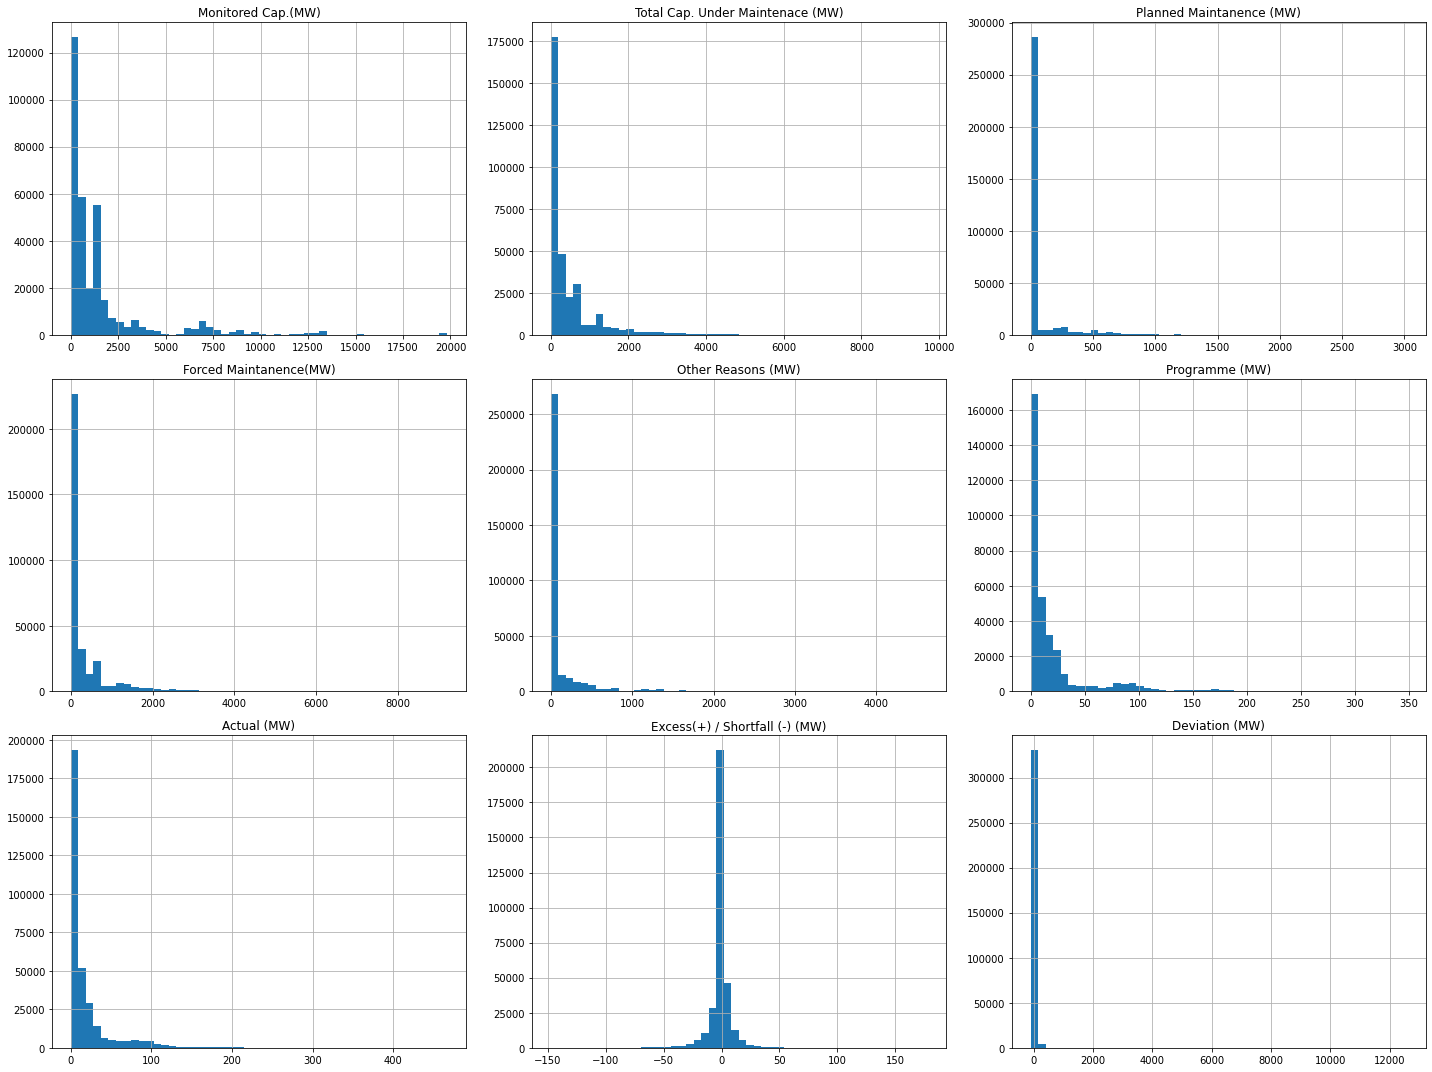

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

<AxesSubplot:>

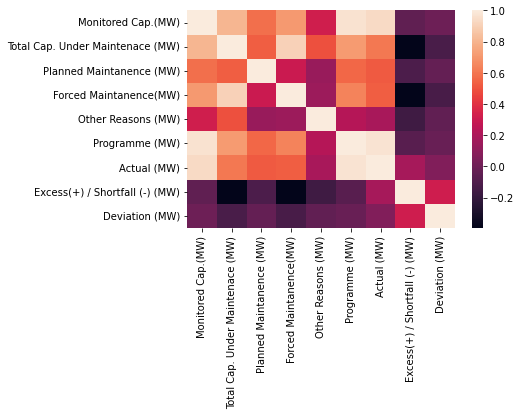

In [ ]:
sns.heatmap(df.corr())

<AxesSubplot:>

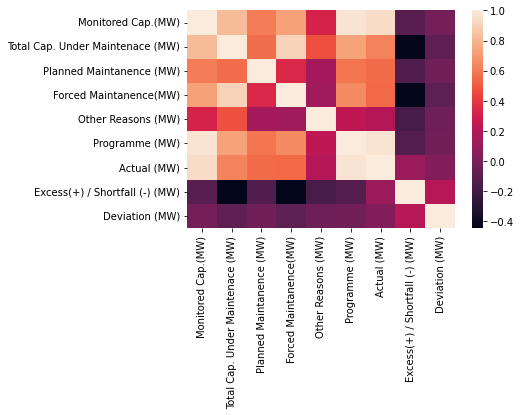

In [ ]:
sns.heatmap(sdf.corr())

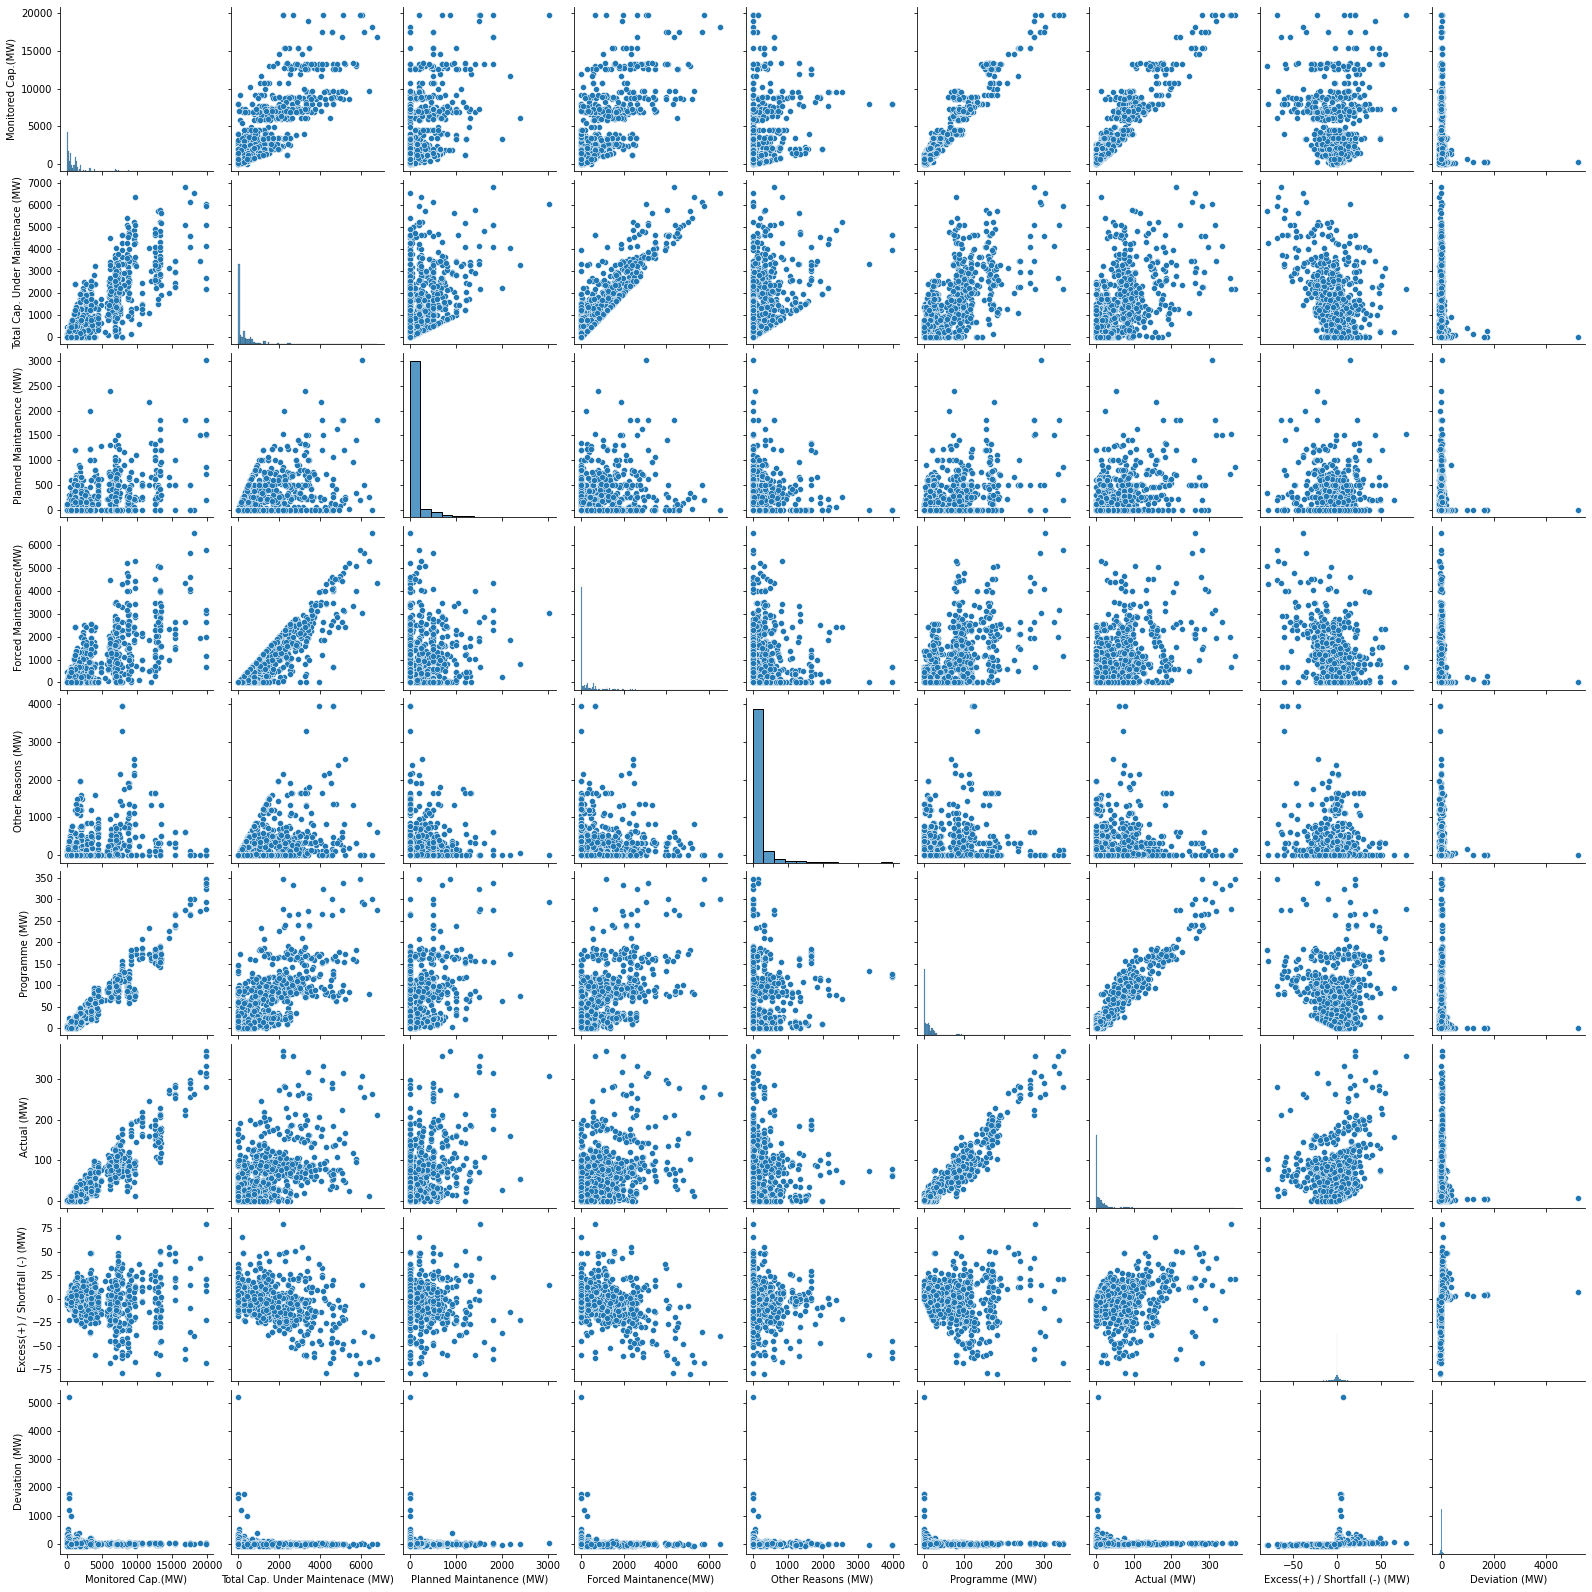

In [ ]:
sns.pairplot(sdf)

In [ ]:
df.columns

Index(['Date', 'Power Station', 'Monitored Cap.(MW)',
       'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)',
       'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)',
       'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'],
      dtype='object')

# `**Initialize the H2O Cluster**`

In [ ]:
!pip3 install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwaqpu5eh
  JVM stdout: /tmp/tmpwaqpu5eh/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpwaqpu5eh/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ou50ny
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df = h2o.import_file('/content/PowerGeneration.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# `**Load the dataset as a H2OFrame**`




In [ ]:
data = h2o.H2OFrame(sdf)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
data.describe(chunk_summary=True)

Rows:3350
Cols:11

Chunk compression summary: 
chunk_type    chunk_name        count    count_percentage    size     size_percentage
------------  ----------------  -------  ------------------  -------  -----------------
C0L           Constant long     1        9.09091             80  B    0.0763694
C1            1-Byte Integers   1        9.09091             3.3 KB   3.26288
C2S           2-Byte Fractions  3        27.2727             19.9 KB  19.4284
C4S           4-Byte Fractions  6        54.5455             79.0 KB  77.2324

Frame distribution summary: 
                 size      number_of_rows    number_of_chunks_per_column    number_of_chunks
---------------  --------  ----------------  -----------------------------  ------------------
127.0.0.1:54321  102.3 KB  3350              1                              11
mean             102.3 KB  3350              1                              11
min              102.3 KB  3350              1                              11
max              102.3 KB  3350              1                              11
stddev           0  B      0                 0                              0
total            102.3 KB  3350              1                              11

,Date,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme (MW),Actual (MW),Excess(+) / Shortfall (-) (MW),Deviation (MW)
type,time,enum,real,real,real,real,real,real,real,real,real
mins,1483920000000.0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-79.55,-100.0
mean,1483920000000.0,,1666.7221164179107,498.0524477611946,66.76164776119394,329.46423880597143,101.8265701492537,21.688779104477604,20.8153253731343,-0.8734567164179098,0.8779671641791071
maxs,1483920000000.0,,19813.59,6795.49,3020.0,6526.8,3960.0,348.19,367.87,79.21,5230.77
sigma,0.0,,2791.665572315505,885.2832070910754,213.07961230928814,690.9149856231357,296.36179587650645,40.66053808390611,40.56009213783568,9.849618581257086,122.3369710562062
zeros,0,,205,1383,2768,1934,2530,715,983,691,723
missing,0,36,0,0,0,0,0,0,0,0,0
0,2017-01-09 00:00:00,SCPL,100.0,50.0,0.0,50.0,0.0,1.86,1.01,-0.85,-45.7
1,2017-01-09 00:00:00,RELIANCE,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-01-09 00:00:00,VEDANTA,600.0,0.0,0.0,0.0,0.0,2.74,1.3,-1.44,-52.55


# `**Split the dataset into train and test set**`

# **Train AutoML Models**
**Let's configure the AutoML training parameters.**

**max_models: Maximum number of models to train**
**balance_classes: set to True to balance the class labels **for tasks with imbalance data **bold text**
**seed : Set for reproducibility **

We can limit the amount of time spent on searching for the best model by limiting:

1. maximum number of models using max_models
2. total time spent using max_runtime_secs
3. time spend training any single model using max_runtime_secs_per_model
Start the training by specifying:

1. training_frame: the dataframe that contains training data -- train in our case
2. y: the column in the training_frame which contains the target variable -- Time_taken(min) in our case


In [ ]:
train, test = data.split_frame(ratios=[0.8], seed = 1)

In [ ]:
aml = H2OAutoML(max_models =5,
                balance_classes=True,
		seed =1)

In [ ]:
aml.train(training_frame = train, y = 'Total Cap. Under Maintenace (MW)')

AutoML progress: |
04:28:41.442: _train param, Dropping bad and constant columns: [Date]

██
04:28:55.804: _train param, Dropping bad and constant columns: [Date]


04:28:57.942: _train param, Dropping bad and constant columns: [Date]

███
04:29:16.172: _train param, Dropping bad and constant columns: [Date]


04:29:23.978: _train param, Dropping bad and constant columns: [Date]

██
04:29:34.625: _train param, Dropping unused columns: [Date]


04:29:36.807: _train param, Dropping unused columns: [Date]

████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/5
# GBM base models (used / total),0/1
# XGBoost base models (used / total),2/2
# DRF base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


# `**What's happening under the hood?**`
H2O AutoML trains the following models in a sequential order:

Three pre-specified XGBoost GBM (Gradient Boosting Machine) models
A fixed grid of GLMs
A default Random Forest (DRF)
Five pre-specified H2O GBMs
A near-default Deep Neural Net
An Extremely Randomized Forest (XRT)
A random grid of XGBoost GBMs
A random grid of H2O GBMs
A random grid of Deep Neural Nets
In addition to these models, H2O AutoML also trains:

A stacked ensemble of all the models trained above
A "Best of Family" Stacked Ensemble that contains the best performing model for each algorithm class.

# `**Interpretting the above training output:**`
The reported metrics are for the stacked ensemble model in H2O AutoML. The metrics are reported separately for the training data and the cross-validation data.

For the training data:

Mean Squared Error (MSE) is 11106.10521015135, which measures the average squared difference between the predicted and actual values.
Root Mean Squared Error (RMSE) is 105.38550759070884
, which is the square root of MSE and provides a measure of how well the model fits the data.
Mean Absolute Error (MAE) is 40.89035725280978, which measures the average absolute difference between the predicted and actual values.
Root Mean Squared Log Error (RMSLE) is NaN, which is the RMS of the logarithmic differences between the predicted and actual values.
R-squared (R^2) is 0.9860313651695877, which is a measure of how well the model fits the data.
The Null deviance, residual deviance, and AIC are also reported.
For the cross-validation data:

The metrics are generally worse than for the training data, which is expected since the model was not trained on this data.
The R^2 is 0.9860313651695877, which is still a reasonable fit but lower than for the training data.
The other metrics are also worse, indicating that the model may be overfitting on the training data.
Evaluation:
After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.



In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20230301_42841,105.386,11106.1,40.8904,nan,11106.1
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_42841,112.575,12673.2,44.082,nan,12673.2
XGBoost_1_AutoML_1_20230301_42841,112.917,12750.2,43.4085,nan,12750.2
XGBoost_2_AutoML_1_20230301_42841,123.639,15286.6,49.0148,nan,15286.6
DRF_1_AutoML_1_20230301_42841,175.254,30713.9,59.8237,1.12207,30713.9
GBM_1_AutoML_1_20230301_42841,233.261,54410.5,78.9477,nan,54410.5
GLM_1_AutoML_1_20230301_42841,891.962,795596,573.989,4.08388,795596


# `**Best Performing Model**`

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_1_AutoML_1_20230301_42841


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/5
# GBM base models (used / total)      0/1
# XGBoost base models (used / total)  2/2
# DRF base models (used / total)      0/1
# GLM base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 586.972673269132
RMSE: 24.227518925163015
MAE: 13.08658399520021
RMSLE: NaN
Mean Residual Deviance: 586.972673269132
R^2: 0.9992617387668151
Null degrees of freedom: 2690
Residual degrees of freedom:

# `**How did AutoML pick this model?**`
The difference between the first 3 models in the leaderboard is that the first two are ensemble models that combine multiple models to make predictions, while the third is a single XGBoost model. The Stacked Ensemble models use a combination of models to make predictions and generally result in better performance compared to a single model.

The model that was probably chosen as the best model is the "StackedEnsemble_AllModels_1_AutoML_1_20230301_42841" model because it has the lowest RMSE, which is a commonly used measure of the prediction error in regression problems. However, it is important to evaluate the model based on other metrics and use cross-validation to get a more accurate estimate of the model's performance on unseen data.


`# Evaluating the best model on a holdout test set using the same evaluation metrics shown above. `


In [ ]:
best_model.model_performance(test)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 8582.064965246223
RMSE: 92.63943525975438
MAE: 39.09141708832065
RMSLE: NaN
Mean Residual Deviance: 8582.064965246223
R^2: 0.9883419117650332
Null degrees of freedom: 658
Residual degrees of freedom: 656
Null deviance: 485162304.08747804
Residual deviance: 5655580.812097261
AIC: 7847.00724833538

Let's examine its results.
MSE (Mean Squared Error): In this case, the MSE is 8582.064965246223, which means that the average squared difference between the predicted and actual delivery times is about 8582.064965246223.

RMSE (Root Mean Squared Error):is the square root of MSE and is used to provide a more interpretable measure of error in the same units as the target variable. The RMSE in this case is 92.63943525975438, which means that on average the predictions are off by about 92.63943525975438 minutes.

MAE (Mean Absolute Error): In this case, the MAE is 39.09141708832065
, which means that on average the predictions are off by 39.09141708832065
about minutes.

RMSLE (Root Mean Squared Log Error): measures the ratio between the predicted and actual values, where the values are first log-transformed. In this case, the RMSLE is 0, which means that the predicted values are off by about NaN on average.

Mean Residual Deviance: measures the variance of the residuals, which is the difference between the predicted and actual values. A lower value indicates a better fit. In this case, the mean residual deviance is 8582.064965246223 minutes.

R^2 (Coefficient of Determination): A value of 1 indicates a perfect fit, while a value of 0 indicates that the model does not explain any of the variance. In this case, the R^2 is 0.9883419117650332, which means that the model explains about 98.8%% of the variance in the delivery times.

Null degrees of freedom and residual degrees of freedom: are the degrees of freedom for the null model (a model with no predictors) and the residual model, respectively. In this case, there are 658 null degrees of freedom and 656 residual degrees of freedom.

Null deviance and residual deviance: measure the deviance of the null model and residual model, respectively. A lower value indicates a better fit. In this case, the null deviance is 485162304.08747804 and the residual deviance is 5655580.812097261.

AIC (Akaike Information Criterion): is a measure of the relative quality of the model, taking into account the number of parameters. A lower value indicates a better fit. In this case, the AIC is 7847.00724833538.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

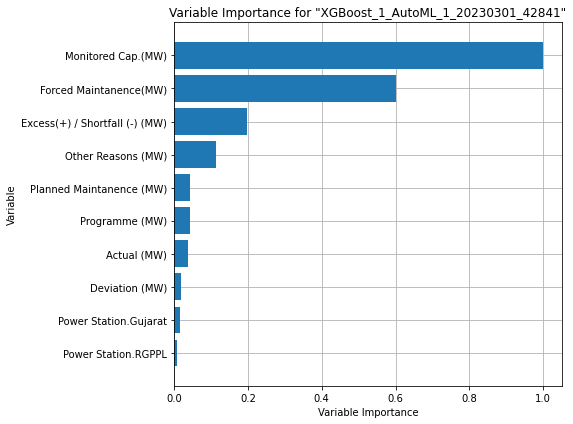

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

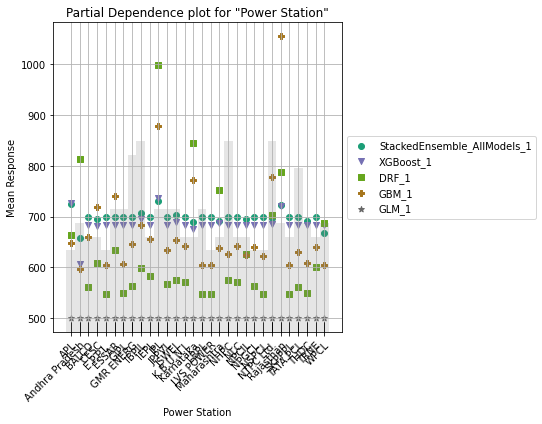

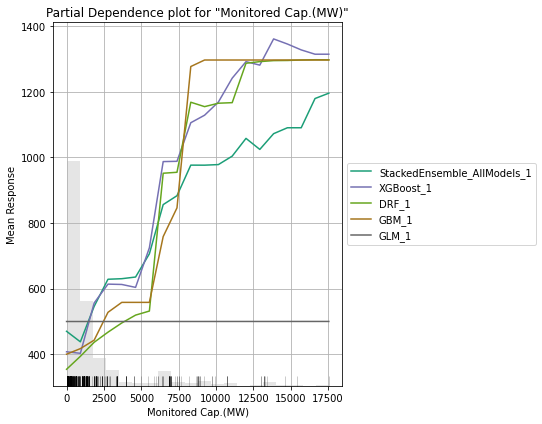

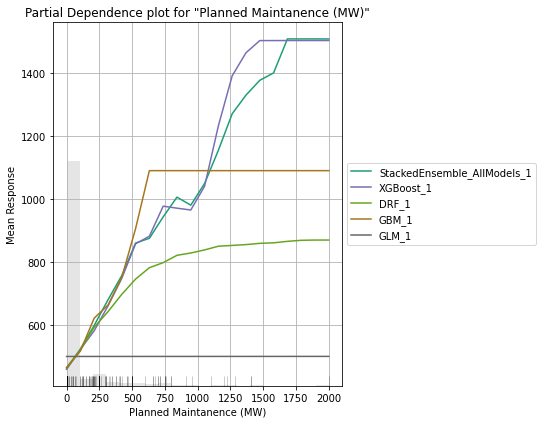

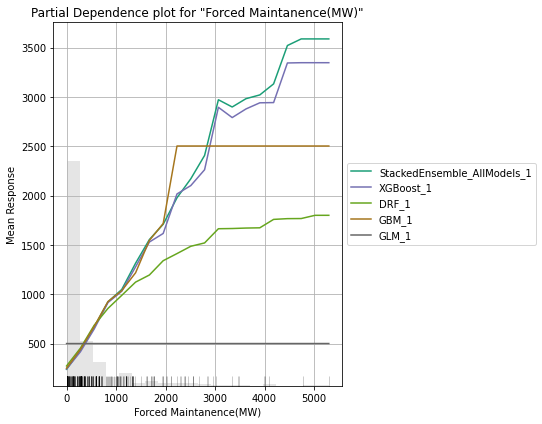

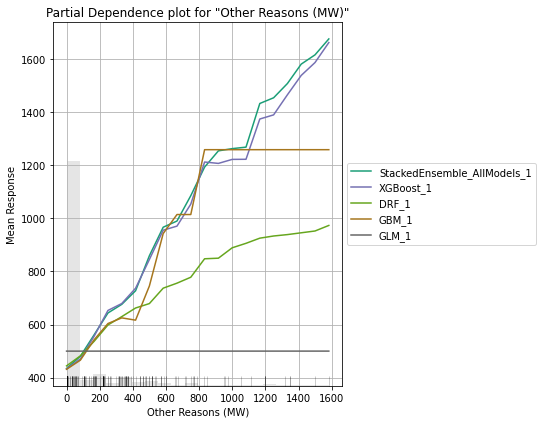

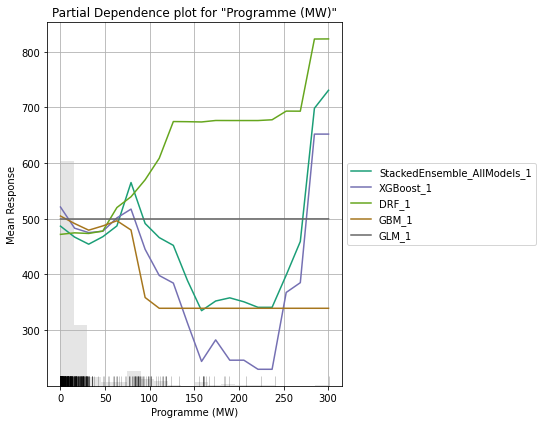

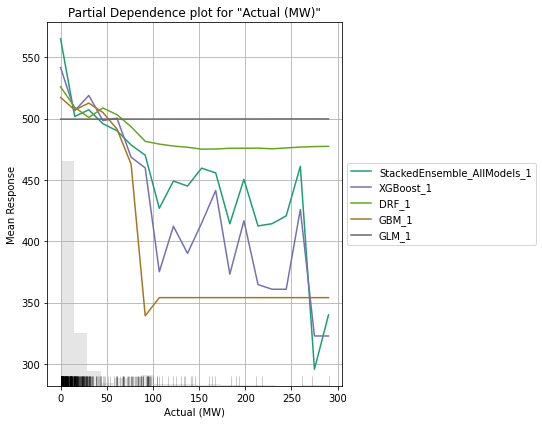

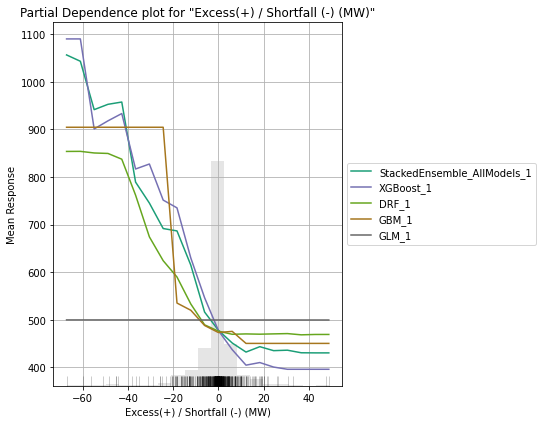

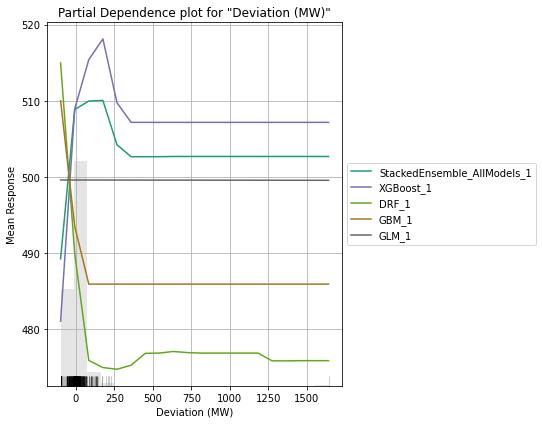

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['pdp'])

Interpretting Feature Importance:

       
       
       
      
'Power Station' has the highest impact on the prediction outcome. This suggests that the ratings of the delivery person play a significant role in determining the duration of delivery.

'Monitored Cap.(MW)' has the second highest impact on the prediction outcome. This suggests that the road traffic density at the time of delivery can affect the delivery time.

'Total Cap. Under Maintenace (MW)', 'Planned Maintanence (MW)', has a moderate impact on the duration. This suggests that the condition of the vehicle used for delivery can affect the target.

'Forced Maintanence(MW)', 'Other Reasons (MW)', 'Programme (MW)', has moderate impact on the prediction outcome. This suggests that the age of the delivery person can affect the delivery duration.

'Actual (MW)', 'Excess(+) / Shortfall (-) (MW)', 'Deviation (MW)'], has a moderate impact on the prediction outcome. This suggests that the weather conditions at the time of delivery can affect the delivery duration.

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

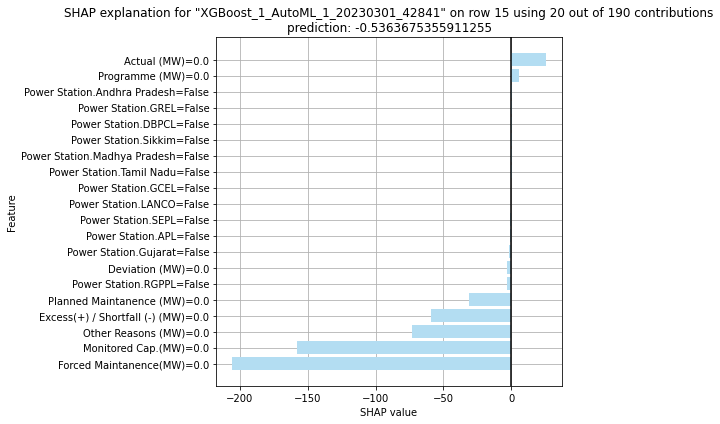

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")

Answers for questions

**Is the relationship significant?**

A: Yes, because the R-sqaured is 0.988 which is very high and all features' p value is 0.

**Are any model assumptions violated?**

A: no, the model is a multiclassification which make sense to all models in AutoML.

**Is there any multicollinearity in the model?**

A: When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model some variables had VIF value greater than 10 and p value was greater than 0.05. 

**In the multivariate models are predictor variables independent of all the other predictor variables?**

A: Yes, they are all independent of each other, it is evident from the heatmap, where each variable doesn't reply on the other variable

**In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

A: Yes from variable graph, there are a couple of parameters which are important, we observe Monitored cap, Forced Maintainance.

**Does the model make sense?**

A: yes, the question is a multiclassfication question and models in AutoML can deal with it

**Does regularization help?** 

A: Regularization is a method for fine-tuning the random noise function by including an extra component. This extra term regulates the function's excessive fluctuation so that neither the coefficients nor the goal value prediction for test data are drastically impacted. In this case no, the rmse from the best model is 29 which is very high, however, and out of bounds in this case

**Which independent variables are significant?**

A: Variables are significant when p-value is less than 0.05. Monitored Cap, Forced Maintainance.

**Which hyperparameters are important?**

A: All hyperparameters are important because they determined the way model works, however, there are some more important one, such as booster,max_depth, ntrees in XGBOOST and learn_rate in GBM.

**Coding professionalism?**

A: yes

# `**Conclusion**`
In this notebook, we examined how H2O AutoML can be used to:

Describe a dataset

Train models with minimal human inputs
Make predictions on a trained model
Explain the model’s predictions


References:


[Automated Machine Learning with H2O](https://towardsdatascience.com/automated-machine-learning-with-h2o-258a2f3a203f)


[H2O AI AutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html)


Licences:
MIT License

Copyright (c) 2023 Pilla Kusuma Pravallika

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.